In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/techin/Complaint_Analysis_Financial_Services/data/complaints.csv")

C:\Users\techin\AppData\Local\Temp\ipykernel_7704\2616015644.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/techin/Complaint_Analysis_Financial_Services/data/complaints.csv")


In [4]:
df.shape

(9609797, 18)

In [5]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [6]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


In [12]:
target_products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later",
    "Savings account",
    "Money transfer, virtual currency, or money service"
]

In [13]:
df = df[df['Product'].isin(target_products)]
print(f"After product filter: {df.shape}")

After product filter: (371752, 18)


In [14]:
df = df[df['Consumer complaint narrative'].notnull()]
print(f"After dropping empty narratives: {df.shape}")

After dropping empty narratives: (177855, 18)


In [18]:
import re
import os

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [20]:
df['Cleaned narrative'] = df['Consumer complaint narrative'].apply(clean_text)

In [21]:
df.to_csv("C:/Users/techin/Complaint_Analysis_Financial_Services/data/filtered_complaints.csv", index=False)

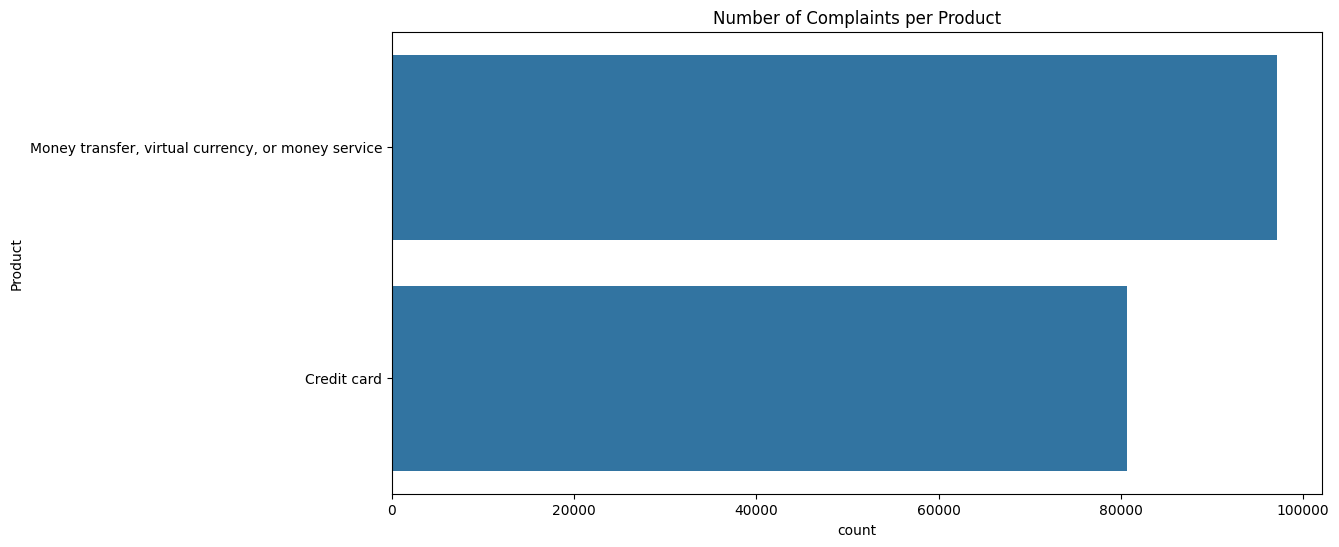

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
plt.title("Number of Complaints per Product")
plt.show()

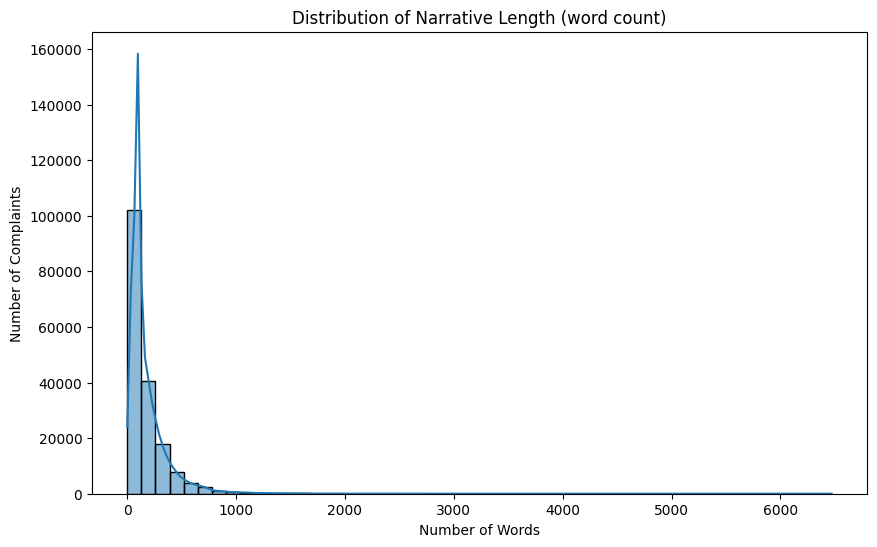

In [23]:
# Create word count column
df['narrative_length'] = df['Cleaned narrative'].dropna().apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.histplot(df['narrative_length'], bins=50, kde=True)
plt.title("Distribution of Narrative Length (word count)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Complaints")
plt.show()